# Zadanie 6
Analiza zbioru danych Heart Disease:
o Wczytaj zbiór danych dotyczący chorób serca.
o Przeprowadź analizę eksploracyjną danych, identyfikując czynniki ryzyka chorób
serca.
o Podziel zbiór danych na zestawy treningowy i testowy.
o Zbuduj klasyfikator SVM do przewidywania obecności choroby serca.
o Oceń jakość klasyfikatora za pomocą różnych metryk, takich jak precyzja, czułość i
specyficzność.
o Zinterpretuj wyniki, starając się zidentyfikować czynniki mające największy wpływ
na ryzyko choroby serca.

In [1]:
from sklearn.datasets import load_digits
import matplotlib.pyplot as plt
import matplotlib.pyplot as plt
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
from sklearn.datasets import load_breast_cancer
from sklearn.linear_model import LogisticRegression
import numpy as np 
from sklearn.manifold import TSNE
from sklearn.svm import SVC
from sklearn.datasets import fetch_openml
import pandas as pd
import seaborn as sns
from sklearn.decomposition import PCA

In [2]:
data = pd.read_csv('heart_failure_clinical_records_dataset.csv')
data

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time,DEATH_EVENT
0,75.0,0,582,0,20,1,265000.00,1.9,130,1,0,4,1
1,55.0,0,7861,0,38,0,263358.03,1.1,136,1,0,6,1
2,65.0,0,146,0,20,0,162000.00,1.3,129,1,1,7,1
3,50.0,1,111,0,20,0,210000.00,1.9,137,1,0,7,1
4,65.0,1,160,1,20,0,327000.00,2.7,116,0,0,8,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
294,62.0,0,61,1,38,1,155000.00,1.1,143,1,1,270,0
295,55.0,0,1820,0,38,0,270000.00,1.2,139,0,0,271,0
296,45.0,0,2060,1,60,0,742000.00,0.8,138,0,0,278,0
297,45.0,0,2413,0,38,0,140000.00,1.4,140,1,1,280,0


In [3]:
# Sprawdzamy kompletność zestawu danych
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 299 entries, 0 to 298
Data columns (total 13 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   age                       299 non-null    float64
 1   anaemia                   299 non-null    int64  
 2   creatinine_phosphokinase  299 non-null    int64  
 3   diabetes                  299 non-null    int64  
 4   ejection_fraction         299 non-null    int64  
 5   high_blood_pressure       299 non-null    int64  
 6   platelets                 299 non-null    float64
 7   serum_creatinine          299 non-null    float64
 8   serum_sodium              299 non-null    int64  
 9   sex                       299 non-null    int64  
 10  smoking                   299 non-null    int64  
 11  time                      299 non-null    int64  
 12  DEATH_EVENT               299 non-null    int64  
dtypes: float64(3), int64(10)
memory usage: 30.5 KB


In [4]:
# Podział na dane treningowe i testowe
X_train, X_test, y_train, y_test = train_test_split(data.loc[:, data.columns != 'DEATH_EVENT'], data['DEATH_EVENT'], stratify=data['DEATH_EVENT'], test_size=0.2)

In [5]:
# Obrazowanie zbioru x treningowego
X_train

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time
140,80.0,0,805,0,38,0,263358.03,1.10,134,1,0,109
194,45.0,0,582,0,20,1,126000.00,1.60,135,1,0,180
92,42.0,0,582,0,60,0,263358.03,1.18,137,0,0,82
235,77.0,1,109,0,50,1,406000.00,1.10,137,1,0,209
273,42.0,0,64,0,40,0,189000.00,0.70,140,1,0,245
...,...,...,...,...,...,...,...,...,...,...,...,...
35,69.0,0,582,1,35,0,228000.00,3.50,134,1,0,30
97,70.0,1,59,0,60,0,255000.00,1.10,136,0,0,85
184,58.0,1,145,0,25,0,219000.00,1.20,137,1,1,170
120,60.0,1,737,0,60,1,210000.00,1.50,135,1,1,95


In [6]:
# Obrazowanie zbiour y treningowego
y_train

140    1
194    1
92     0
235    0
273    0
      ..
35     1
97     0
184    1
120    0
16     1
Name: DEATH_EVENT, Length: 239, dtype: int64

In [8]:
# Inicjalizacja i trenowanie modelu SVM
svm_classifier = SVC(kernel='sigmoid')
svm_classifier.fit(X_train, y_train)

SVC(kernel='sigmoid')

In [9]:
# Predykcja etykiet dla danych testowych
y_pred = svm_classifier.predict(X_test)

In [10]:
# Obliczenie dokładności modelu
accuracy = accuracy_score(y_test, y_pred)
print("Dokładność modelu SVM:", accuracy)

Dokładność modelu SVM: 0.6833333333333333


In [11]:
conf_matrix = confusion_matrix(y_test, y_pred)
def specificity_score(y_true, y_pred):
 tn, fp, fn, tp = confusion_matrix(y_true, y_pred).ravel()
 specificity = tn / (tn + fp)
 return specificity
# Obliczenie specyficzności
specificity = specificity_score(y_test, y_pred)
print("Specyficzność:", specificity)

Specyficzność: 1.0


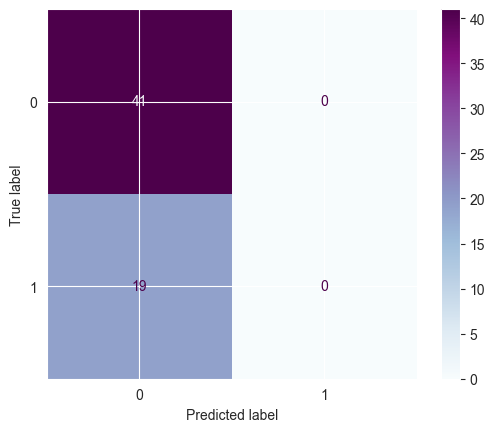

In [12]:
disp = ConfusionMatrixDisplay(confusion_matrix=conf_matrix)
disp.plot(cmap='BuPu')
plt.show()

In [13]:
# Obliczenie precyzji
precision = precision_score(y_test, y_pred, average='micro')
print("Precyzja modelu: {:.2f}%".format(precision * 100))

Precyzja modelu: 68.33%


# Wnioski
W naszym modelu występuję nierówność pomiędzy klasami przez co nasz model o wiele bardziej wykrywa osoby które nie umrą (0) a o wiele gorzej zagrożone śmiercią przez co osobiście nie zastosowałbym tego modelu do identyfikacji zagrożenia śmiercią od chorób serca.

# Dodatek
Przeprowadzę jeszcze analizę pca bo jestem ciekawy czy będzie coś widać.

In [14]:
# Stosowanie PCA
pca = PCA(n_components=2)
# Dopasowanie PCA do danych i transformacja
test_data = data.loc[:, data.columns != 'DEATH_EVENT']
X_pca = pca.fit_transform(test_data)
# Wyświetlenie nowych danych po zastosowaniu PCA
print("Nowe dane po zastosowaniu PCA:")
print(X_pca)

Nowe dane po zastosowaniu PCA:
[[ 1.64196941e+03 -1.45905476e-01]
 [ 1.76651776e+00  7.27925497e+03]
 [-1.01358133e+05 -4.11138654e+02]
 [-5.33581431e+04 -4.57772091e+02]
 [ 6.36418652e+04 -4.37190782e+02]
 [-5.93581585e+04 -5.20368469e+02]
 [-1.36358108e+05 -3.02651136e+02]
 [ 1.90641900e+05 -3.13030542e+02]
 [-1.03171326e-01 -4.24764808e+02]
 [ 1.24641855e+05 -4.89016598e+02]
 [ 1.04641845e+05 -5.26159478e+02]
 [-1.03581152e+04 -3.48224963e+02]
 [-1.27357930e+05  4.30184083e+02]
 [ 1.26418690e+04 -4.16804434e+02]
 [ 1.63641843e+05 -5.41449181e+02]
 [-2.16358073e+05 -1.50263252e+02]
 [-1.35813541e+03 -4.32444359e+02]
 [-9.73580275e+04  2.39071748e+01]
 [-2.63581405e+04 -4.50353326e+02]
 [-1.76358025e+05  4.30531275e+01]
 [ 1.26418407e+04 -5.32815727e+02]
 [ 3.36418586e+04 -4.61918956e+02]
 [ 2.56418812e+04 -3.67981978e+02]
 [ 1.04641841e+05 -5.44158147e+02]
 [-2.87648224e-04  2.33343258e-01]
 [-1.14358132e+05 -4.06016657e+02]
 [-6.73581424e+04 -4.53442564e+02]
 [ 2.06418576e+04 -4.647

# Analiza komponentów głównych PCA

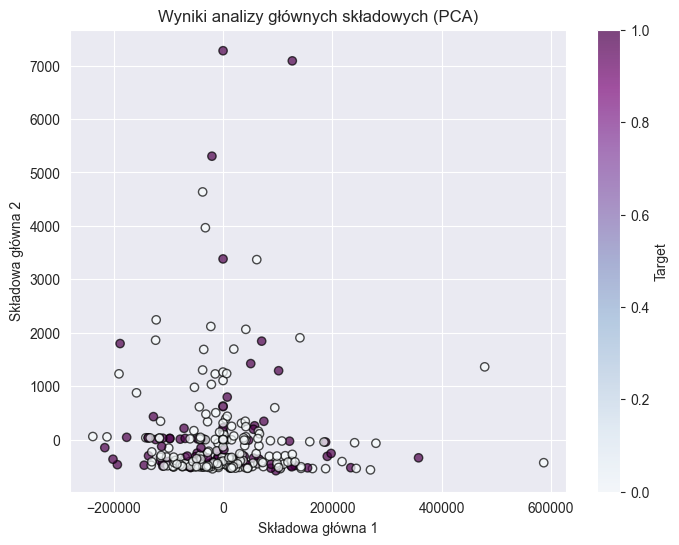

In [15]:
# Wykres wyników PCA
plt.figure(figsize=(8, 6))
scatter = plt.scatter(X_pca[:, 0], X_pca[:, 1], c=data['DEATH_EVENT'], cmap='BuPu', edgecolor='k', alpha=0.7)
plt.title('Wyniki analizy głównych składowych (PCA)')
plt.xlabel('Składowa główna 1')
plt.ylabel('Składowa główna 2')
plt.grid(True)
# Dodanie legendy z etykietami klas
plt.colorbar(scatter, label='Target')
plt.show()

In [16]:
# Stosowanie TSNE
tsne = TSNE(n_components=2)
# Dopasowanie PCA do danych i transformacja
test_data = data.loc[:, data.columns != 'DEATH_EVENT']
X_tsne = tsne.fit_transform(test_data)
# Wyświetlenie nowych danych po zastosowaniu TSNE
print("Nowe dane po zastosowaniu TSNE:")
print(X_tsne)

Nowe dane po zastosowaniu TSNE:
[[ 4.98183060e+00 -7.53635108e-01]
 [ 3.26453209e+00  1.40232921e+00]
 [-2.41077843e+01  1.59492806e-01]
 [-1.60553837e+01 -1.00217164e+00]
 [ 2.02397995e+01 -8.27266425e-02]
 [-1.74481544e+01 -8.27448547e-01]
 [-2.72314548e+01  8.11921179e-01]
 [ 2.84518318e+01  6.84979022e-01]
 [ 3.24952722e+00 -1.54499066e+00]
 [ 2.59782200e+01  7.25047350e-01]
 [ 2.47152519e+01  2.34283894e-01]
 [-2.64991426e+00 -1.37086892e+00]
 [-2.66713943e+01  2.73471624e-01]
 [ 1.01227522e+01 -5.00867784e-01]
 [ 2.77121696e+01  6.43727481e-01]
 [-2.94427948e+01  8.32362711e-01]
 [ 2.14214110e+00 -1.10703528e+00]
 [-2.35366840e+01  7.06022233e-02]
 [-7.07455492e+00 -1.50447905e+00]
 [-2.87997169e+01  7.64224946e-01]
 [ 1.01232014e+01 -5.03346860e-01]
 [ 1.52948523e+01 -1.79728284e-01]
 [ 1.33339920e+01 -3.10427248e-01]
 [ 2.47152424e+01  2.34250411e-01]
 [ 3.07903600e+00 -1.15479815e+00]
 [-2.56113911e+01  1.30008385e-01]
 [-1.89984512e+01 -6.22136295e-01]
 [ 1.20441513e+01 -4.02

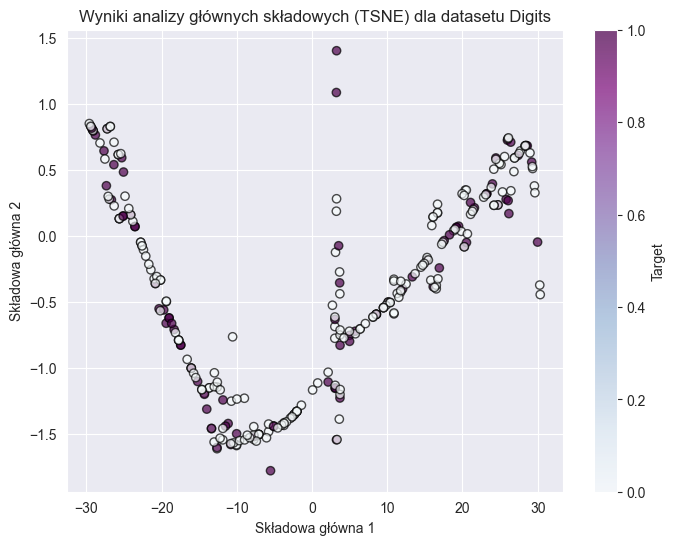

In [17]:
# Wykres wyników TSNE
plt.figure(figsize=(8, 6))
scatter = plt.scatter(X_tsne[:, 0], X_tsne[:, 1], c=data['DEATH_EVENT'], cmap='BuPu', edgecolor='k', alpha=0.7)
plt.title('Wyniki analizy głównych składowych (TSNE) dla datasetu Digits')
plt.xlabel('Składowa główna 1')
plt.ylabel('Składowa główna 2')
plt.grid(True)
# Dodanie legendy z etykietami klas
plt.colorbar(scatter, label='Target')
plt.show()